In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from pytrends.request import TrendReq

In [3]:
pytrends = TrendReq(hl='en-US', tz=360)
pytrends.suggestions(keyword='bitcoin')

[{'mid': '/m/05p0rrx', 'title': 'Bitcoin', 'type': 'Currency'},
 {'mid': '/g/11gdq16zww', 'title': 'Bitcoin.com', 'type': 'Topic'},
 {'mid': '/m/0y4vk1r', 'title': 'Kraken', 'type': 'Topic'},
 {'mid': '/g/11d_wtvc5k', 'title': 'Bitcoin Cash', 'type': 'Cryptocurrency'},
 {'mid': '/g/11gxssjj8h', 'title': 'Bitcoin SV', 'type': 'Topic'}]

In [4]:
kw_list = ['bitcoin','binance','coinbase']
cat = 0
geo = ''
timeframe = '2020-01-01 2021-10-01'

,bitcoin,binance,coinbase
geoName,,,
Afghanistan,0,0,0
Albania,0,0,0
Algeria,0,0,0
American Samoa,0,0,0
Andorra,0,0,0
...,...,...,...
Western Sahara,0,0,0
Yemen,0,0,0
Zambia,0,0,0


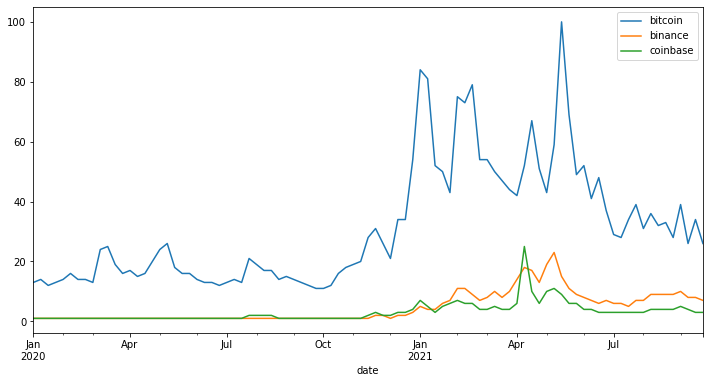

In [5]:
pytrends.build_payload(kw_list, cat=cat, timeframe=timeframe, geo=geo, gprop='')
data = pytrends.interest_over_time()
%matplotlib inline

data.plot(figsize = (12,6))

app = pytrends.interest_by_region(resolution='COUNTRY')
app

In [6]:
data

,bitcoin,binance,coinbase,isPartial
date,,,,
2020-01-05,13,1,1,False
2020-01-12,14,1,1,False
2020-01-19,12,1,1,False
2020-01-26,13,1,1,False
2020-02-02,14,1,1,False
...,...,...,...,...
2021-08-29,28,9,4,False
2021-09-05,39,10,5,False
2021-09-12,26,8,4,False


In [7]:
import yfinance as yf

In [8]:
price = yf.download('BTC-USD', start='2020-01-01', end='2021-10-01', interval='1wk')

[*********************100%***********************]  1 of 1 completed


In [9]:
df_price = price['Adj Close']

In [10]:
df_price = df_price[1:]

In [11]:
ret = df_price.pct_change()

In [12]:
ret = ret[1:]

In [13]:
data.iloc[:,:-1]

,bitcoin,binance,coinbase
date,,,
2020-01-05,13,1,1
2020-01-12,14,1,1
2020-01-19,12,1,1
2020-01-26,13,1,1
2020-02-02,14,1,1
...,...,...,...
2021-08-29,28,9,4
2021-09-05,39,10,5
2021-09-12,26,8,4


In [14]:
X = data.iloc[1:,:-1]
y = ret

In [15]:
X

,bitcoin,binance,coinbase
date,,,
2020-01-12,14,1,1
2020-01-19,12,1,1
2020-01-26,13,1,1
2020-02-02,14,1,1
2020-02-09,16,1,1
...,...,...,...
2021-08-29,28,9,4
2021-09-05,39,10,5
2021-09-12,26,8,4


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
from sklearn import metrics

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [18]:
X_train

,bitcoin,binance,coinbase
date,,,
2021-07-11,28,6,3
2021-02-21,79,9,6
2021-04-04,42,14,6
2020-11-08,20,1,1
2021-05-30,49,9,6
...,...,...,...
2020-02-02,14,1,1
2020-01-26,13,1,1
2020-02-23,14,1,1


In [19]:
model = LinearRegression()

In [20]:
reg = model.fit(X_train, y_train)

In [21]:
reg = model.fit(X_train, y_train)

In [22]:
y_pred = model.predict(X_test)

In [23]:
print('Score = ', metrics.r2_score(y_test,y_pred))

Score =  -0.8376943453674282


In [24]:
m = model.coef_
b = model.intercept_

In [25]:
m

array([-0.00069288, -0.01402308,  0.02512263])

In [26]:
b

0.03953613392239828

In [27]:
print("MAE = ",  metrics.mean_absolute_error(y_test,y_pred))
print("MSE = ",  metrics.mean_squared_error(y_test,y_pred))
print("RMSE = ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE =  0.11902661788590144
MSE =  0.02733924623172345
RMSE =  0.16534583826550775


In [28]:
df_report = pd.DataFrame({'Actually': y_test, 'Predicted':y_pred})

In [29]:
df_report

,Actually,Predicted
Date,,
2020-08-17,-0.019168,0.063979
2021-04-19,-0.128289,0.005947
2021-04-12,-0.066253,0.379157
2020-06-08,-0.038126,0.040935
2021-07-26,0.130826,-0.010280
2020-03-09,-0.334948,0.034007
2020-10-05,0.066975,0.043014
2020-12-07,-0.010480,0.061208
2020-04-20,0.068217,0.039550


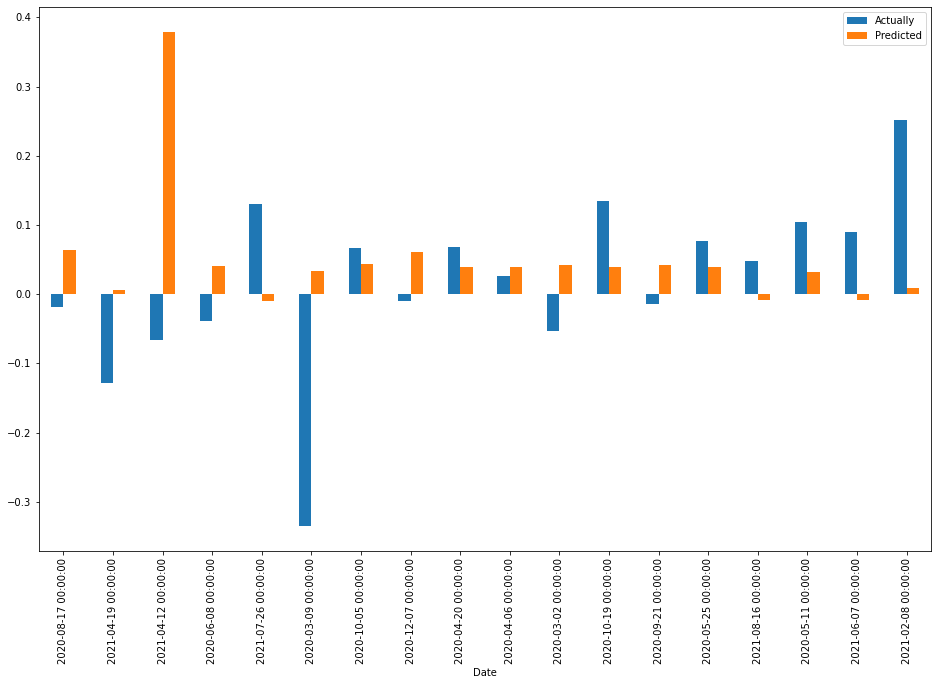

In [30]:
df1 = df_report.head(20)
df1.plot(kind="bar",figsize=(16,10))
plt.show()